In [1]:
import os
import pandas as pd
## Import relevant libraries
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../py_files/')
import quadrop as qd

# import gaussian filter
from scipy.ndimage import gaussian_filter1d
# qd.set_plotting_style()

This notebook starts by concatenating all the merged_expression_PIV.csv files
from the different experiments. These files combine expression data with PIV
data.


In [2]:
def concatenate_merged_expression_piv(data_paths, output_save_folder=None):
    """
    Concatenate the merged_expression_PIV.csv files from multiple data paths into one file.

    Parameters:
    - data_paths: List of paths where the merged_expression_PIV.csv files are located.
    - output_folder: Folder where the merged_expression_PIV.csv files are stored.
    - merged_file_name: Name of the merged expression PIV file to read.
    - output_file_name: Name of the output concatenated file to save.
    - output_save_folder: Folder where the concatenated file will be saved. If None, save in the first data path's output folder.
    
    The concatenated file will be saved in the specified `output_save_folder`, or the first path in `data_paths` if not provided.
    """
    
    output_folder="output_data"
    merged_file_name="merged_expression_PIV.csv"
    output_file_name="merged_expression_PIV.csv"
    
    # List to store DataFrames from each path
    dataframes = []

    # Loop over each data path
    for path in data_paths:
        merged_file_path = os.path.join(path, output_folder, merged_file_name)
        
        # Check if the merged file exists
        if os.path.exists(merged_file_path):
            # Read the merged_expression_PIV.csv file
            df = pd.read_csv(merged_file_path)
            dataframes.append(df)
            print(f"Loaded data from: {merged_file_path}")
        else:
            print(f"File not found: {merged_file_path}")

    if not dataframes:
        print("No valid files found to concatenate.")
        return

    # Concatenate all DataFrames
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Determine the output directory
    if output_save_folder is None:
        output_save_folder = os.path.join(data_paths[0], output_folder)
    
    os.makedirs(output_save_folder, exist_ok=True)  # Ensure the output directory exists
    
    # Save the concatenated DataFrame to the output directory
    output_file_path = os.path.join(output_save_folder, output_folder, output_file_name)
    concatenated_df.to_csv(output_file_path, index=False)

    conditions = list(concatenated_df['condition'].unique())
    columns = list(concatenated_df.columns)

    print(f"Concatenated DataFrame saved to: {output_file_path}")

    return conditions, columns
    


ThTr = "../../../../Thomson Lab Dropbox/David Larios/activedrops/ubuntu/020124-ThTr-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv"



output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"

# Example usage of the function:
conditions, columns = concatenate_merged_expression_piv(
    data_paths=[ThTr, ],
    output_save_folder = output_save_folder
)


File not found: ../../../../Thomson Lab Dropbox/David Larios/activedrops/ubuntu/020124-ThTr-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv/output_data/merged_expression_PIV.csv
No valid files found to concatenate.


TypeError: cannot unpack non-iterable NoneType object

Now let's load the dataframe and make corrections.

In [3]:
df = pd.read_csv("../../../../Thomson Lab Dropbox/David Larios/activedrops/ubuntu/020124-ThTr-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv")
df

,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Number of Protein Molecules,Rate of Change of Protein Molecules per Second,...,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h)
0,ThTr_1p25nM-RT,Rep1,0,0.0,0.00,0.000000,0.000000,0.000000,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ThTr_1p25nM-RT,Rep1,216,3.6,0.06,0.283832,0.009057,0.131643,1.579718e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ThTr_1p25nM-RT,Rep1,432,7.2,0.12,0.438521,0.013993,0.203389,2.440668e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ThTr_1p25nM-RT,Rep1,648,10.8,0.18,0.925349,0.029528,0.429183,5.150196e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ThTr_1p25nM-RT,Rep1,864,14.4,0.24,1.011776,0.032286,0.469268,5.631221e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,ThTr_160nM-RT,Rep1,140184,2336.4,38.94,538.090587,17.170415,249.569987,2.994840e+11,-935239.657525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5228,ThTr_160nM-RT,Rep1,140400,2340.0,39.00,537.821211,17.161819,249.445048,2.993341e+11,-888961.391265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5229,ThTr_160nM-RT,Rep1,140616,2343.6,39.06,537.448472,17.149925,249.272169,2.991266e+11,-856250.637770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5230,ThTr_160nM-RT,Rep1,140832,2347.2,39.12,537.127545,17.139685,249.123321,2.989480e+11,-832088.724986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['condition'].unique()

array(['ThTr_1p25nM-RT', 'ThTr_2p5nM-RT', 'ThTr_5nM-RT', 'ThTr_10nM-RT',
       'ThTr_20nM-RT', 'ThTr_40nM-RT', 'ThTr_80nM-RT', 'ThTr_160nM-RT'],
      dtype=object)

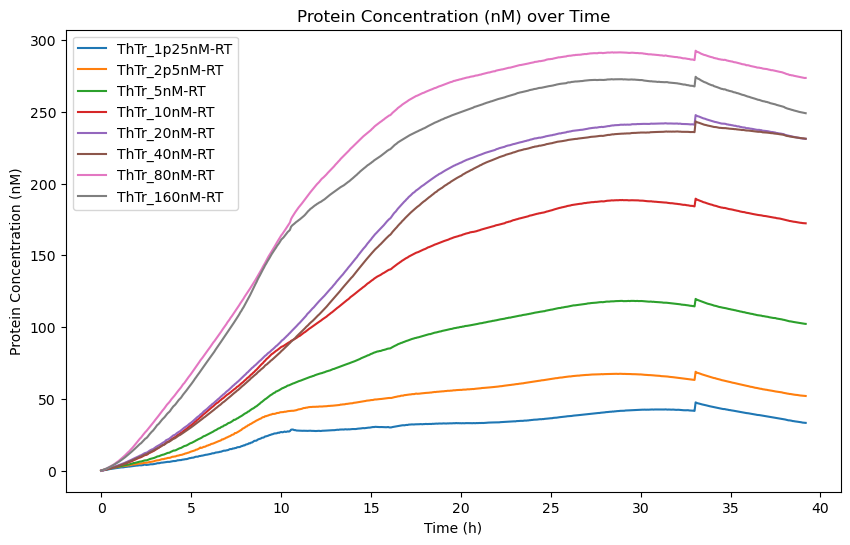

In [8]:
# Filter for non-null protein concentration data
df_filtered = df[df['Protein Concentration_nM'].notnull()]

# Create the plot
plt.figure(figsize=(10, 6))
for condition in df_filtered['condition'].unique():
    condition_data = df_filtered[df_filtered['condition'] == condition]
    plt.plot(condition_data['Time_h'], condition_data['Protein Concentration_nM'], label=condition)

plt.xlabel('Time (h)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration (nM) over Time')
plt.legend()
plt.show()


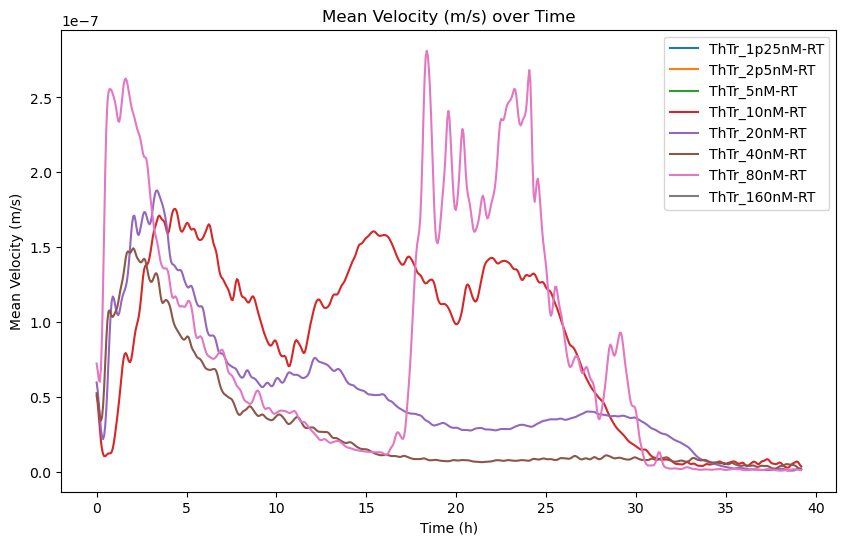

In [ ]:
from scipy.ndimage import gaussian_filter1d

# Create the plot for mean velocity vs time
plt.figure(figsize=(10, 6))
for condition in df_filtered['condition'].unique():

    condition_data = df_filtered[df_filtered['condition'] == condition]
    smoothed_velocity = gaussian_filter1d(condition_data['velocity magnitude [m/s]_mean'], sigma=2)
    plt.plot(condition_data['Time_h'], smoothed_velocity, label=condition)

plt.xlabel('Time (h)')
plt.ylabel('Mean Velocity (m/s)')
plt.title('Mean Velocity (m/s) over Time')

# plt.xlim(0, 200)
# plt.yscale('log')

# plot 

plt.legend()
plt.show()


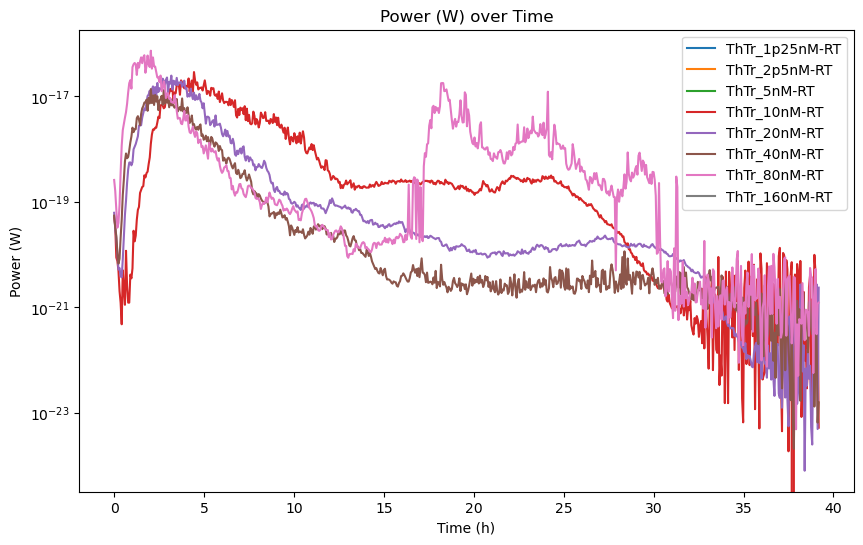

In [13]:
# Create the plot for power vs time
plt.figure(figsize=(10, 6))
for condition in df_filtered['condition'].unique():
    condition_data = df_filtered[df_filtered['condition'] == condition]
    plt.plot(condition_data['Time_h'], condition_data['power [W]_mean'], label=condition)

plt.xlabel('Time (h)')
plt.ylabel('Power (W)')
plt.yscale('log')
plt.title('Power (W) over Time')
plt.legend()
plt.show()
